# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

#carregando o dataset
tips = sns.load_dataset("tips")

#criando as variáveis necessárias
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

#removendo outliers:
tips = tips[tips['tip_pct']<.5]

In [3]:
# 1. Criando a matriz de design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [4]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           8.79e-23
Time:                        14:07:29   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.446      0.000       0.590       1.529
sex[T.Female]     -0.0005      0.153     -0.003      0.997      -0.302       0.301
smoker[T.No]       0.2143      0.148      1.450      0.148      -0.077       0.505
time[T.Dinner]     0.0079      0.164      0.048      0.962      -0.315       0.331
net_bill           0.1058      0.009     11.483      0.000       0.088       0.124
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.889
Skew:                           0.682   Prob(JB):                     2.69e-13
Kurtosis:                       4.969   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 2. Removendo as variáveis não significantes
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.41e-25
Time:                        14:07:29   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

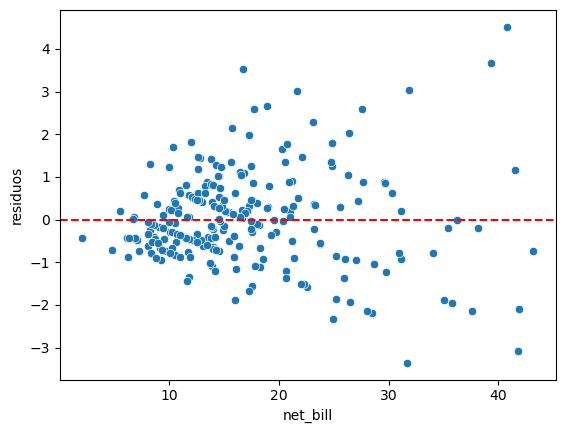

In [6]:
# 3. Gráfico de resíduos em função de net_bill

tips['residuos'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'residuos', data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '--');

In [7]:
# 4.1 transformando net_bill no log
reg = smf.ols('tip ~ np.log(net_bill)', tips).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.13e-25
Time:                        14:07:30   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427     -4.651      0.000      -2.826      -1.144
np.log(net_bill)     1.8248      0.155     11.808      0.000       1.520       2.129
==============================================================================
Omnibus:                       46.523   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.909
Skew:                           0.881   Prob(JB):                     3.04e-25
Kurtosis:                       5.844   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# 4.2 transformando net_bill em um polinômio
modelo = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     70.98
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           6.36e-25
Time:                        14:07:30   Log-Likelihood:                -364.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     239   BIC:                             745.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6297      0.358      1.757      0.080      -0.076       1.336
net_bill                  0.1716      0.037      4.618      0.000       0.098       0.245
np.power(net_bill, 2)    -0.0016      0.001     -1.863      0.064      -0.003    8.93e-05
==============================================================================
Omnibus:                       37.043   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.736
Skew:                           0.727   Prob(JB):                     6.56e-19
Kurtosis:                       5.488   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# 4.3 Escolhendo o melhor modelo
# O último modelo seria o escolhido pq tem um R2 maior

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# 1. Criando a matriz de design
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     31.32
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           6.07e-21
Time:                        14:07:30   Log-Likelihood:                -90.268
No. Observations:                 242   AIC:                             190.5
Df Residuals:                     237   BIC:                             208.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4070      0.076      5.321      0.000       0.256       0.558
sex[T.Female]      0.0047      0.049      0.096      0.923      -0.092       0.101
smoker[T.No]       0.0668      0.047      1.408      0.160      -0.027       0.160
time[T.Dinner]     0.0031      0.053      0.058      0.954      -0.101       0.107
net_bill           0.0323      0.003     10.926      0.000       0.026       0.038
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.073
Skew:                          -0.298   Prob(JB):                        0.130
Kurtosis:                       3.221   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 2. Removendo as variáveis não significantes
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.82e-23
Time:                        14:07:30   Log-Likelihood:                -91.279
No. Observations:                 242   AIC:                             186.6
Df Residuals:                     240   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4604      0.053      8.617      0.000       0.355       0.566
net_bill       0.0318      0.003     11.128      0.000       0.026       0.037
==============================================================================
Omnibus:                        5.775   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.480
Skew:                          -0.354   Prob(JB):                       0.0646
Kurtosis:                       3.204   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

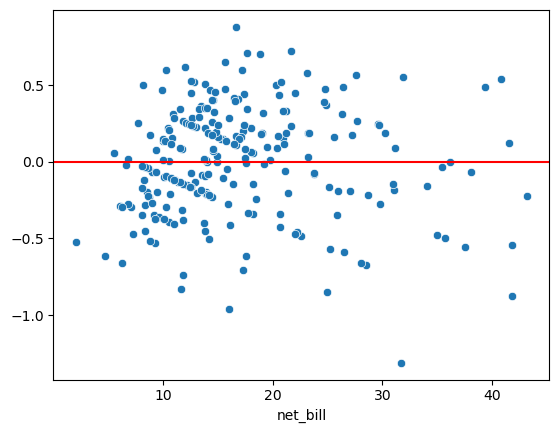

In [12]:
# 3. Gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = reg.resid, data = tips)
plt.axhline(y = 0, color = 'r', linestyle = '-')

In [13]:
# 4.1 transformando net_bill no log
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.20e-28
Time:                        14:07:30   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)     0.5973      0.048     12.547      0.000       0.504       0.691
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 4.2 transformando net_bill em um polinômio
y, X = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2)', tips)
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     86.19
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.01e-17
Time:                        14:08:34   Log-Likelihood:                -104.49
No. Observations:                 242   AIC:                             213.0
Df Residuals:                     240   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7780      0.034     23.025      0.000       0.711       0.845
np.power(net_bill, 2)     0.0006    6.8e-05      9.284      0.000       0.000       0.001
==============================================================================
Omnibus:                        3.195   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.202
Skew:                          -0.278   Prob(JB):                        0.202
Kurtosis:                       2.905   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# 5.1 calculando o 𝑅2 na escala de tip (sem o log)
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg = sm.OLS(y, X).fit()
reg.rsquared

0.3674763728526953

In [18]:
# 5.2 Comparando com o modelo do item 1
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
reg = sm.OLS(y, X).fit()
reg.rsquared

0.345824165634118

In [19]:
# 5.3 O modelo sem log tem melhor coeficiente de determinação

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [28]:
# Carregando a base
df = pd.read_csv('previsao_de_renda.csv').dropna().drop_duplicates().drop('Unnamed: 0', axis=1)
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [31]:
# 1.
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:01:52   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tempo_emprego', ylabel='residuos'>

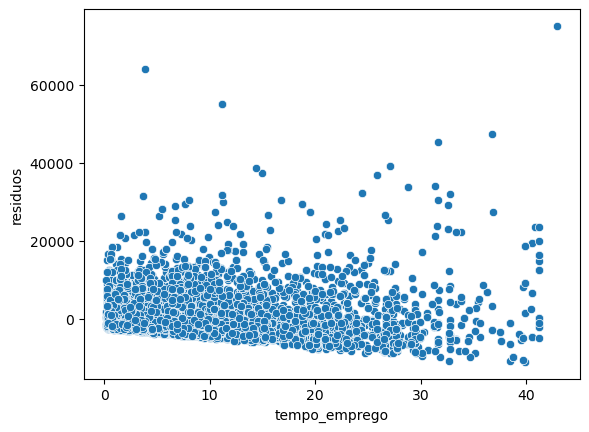

In [33]:
# 2.
df['residuos'] = reg.resid
sns.scatterplot(y='residuos', x='tempo_emprego', data=df);

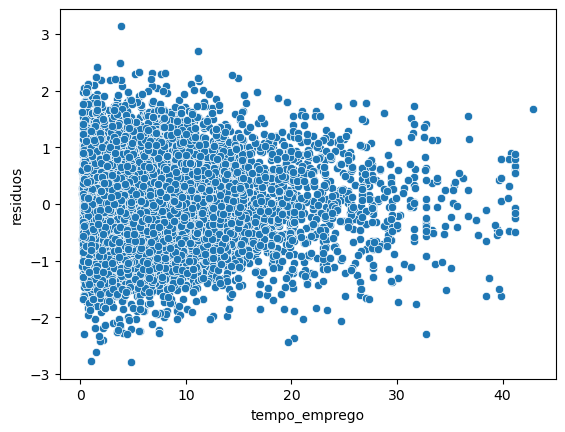

In [35]:
# com log na variável resposta, os resíduos ficam mais bem espalhados:
reg = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()
df['residuos'] = reg.resid
sns.scatterplot(y='residuos', x='tempo_emprego', data=df);

In [41]:
# 3. 
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', 
               data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:26:06   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

In [40]:
# 4.
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo + posse_de_imovel', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1195.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:23:47   Log-Likelihood:                -13353.
No. Observations:               12466   AIC:                         2.671e+04
Df Residuals:                   12462   BIC:                         2.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.5320      0.014    526.755      0.000       7.504       7.560
sexo[T.M]                   0.4662      0.013     34.956      0.000       0.440       0.492
posse_de_imovel[T.True]     0.1085      0.013      8.167      0.000       0.082       0.135
tempo_emprego               0.0497      0.001     52.674      0.000       0.048       0.052
==============================================================================
Omnibus:                        1.270   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.249
Skew:                           0.007   Prob(JB):                        0.535
Kurtosis:                       3.047   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# O novo modelo contém as variáveis explicativas com maior significância

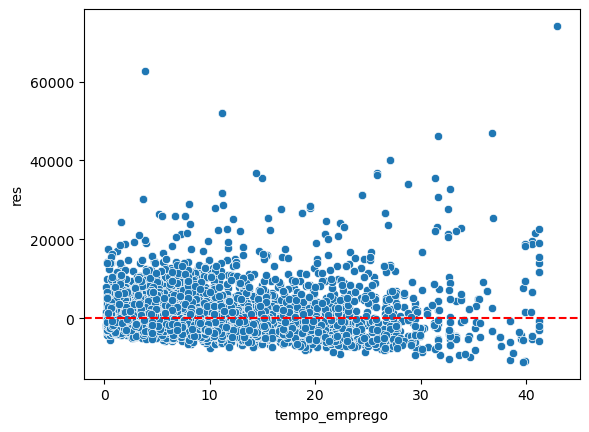

In [42]:
# 5.
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y = 0, color = 'r', linestyle = '--');

<AxesSubplot:xlabel='sexo', ylabel='res'>

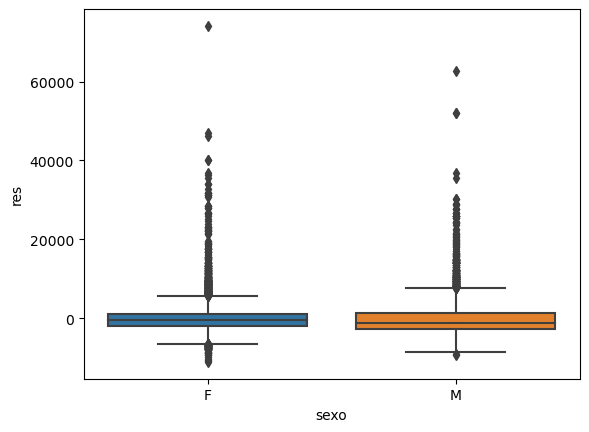

In [43]:
sns.boxplot(x = 'sexo', y = 'res', data = df)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='res'>

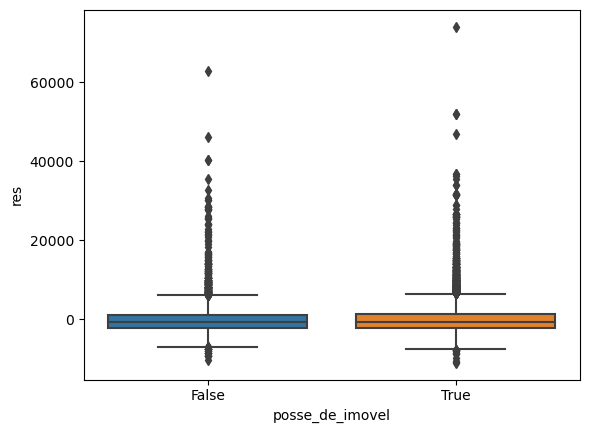

In [44]:
sns.boxplot(x = 'posse_de_imovel', y = 'res', data = df)

Muitos outliers encontrados na análise dos resíduos, que ficaram melhor distribuidos com a transformação de renda para log de renda.